Celeb Faces Dataset (CelebA)
=================================================
---
Introduction au Deep Learning  (IDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## Episode 2 : Check clustered dataset

 - Reload our dataset
 - Check and verify


## Step 1 - Import and init
### 1.2 - Import

In [1]:
import numpy as np
import pandas as pd

import os,time,sys,json,glob
import math, random

from importlib import reload

sys.path.append('..')
import fidle.pwk as ooo

ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.2.7
Run time             : Sunday 9 February 2020, 00:00:05
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf


### 1.2 - Directories and files :

In [2]:
# ---- The dataset directory
dataset_dir = '/bettik/PROJECTS/pr-fidle/datasets/celeba'

# ---- The location of our clusters of data
cluster_dir  = f'{dataset_dir}/clusters'

## Step 2 - Reload and verify data to be sure ;-)
The clusters are all retrieved and all images are normalized.  
We're going to do some statistics to make sure we have all the data.  
We'll pick one image per cluster to check that everything is good.

In [15]:
# ---- Return a legend from a description 
def get_legend(x_desc,i):
    cols  = x_desc.columns
    desc  = x_desc.iloc[i]
    legend =[]
    for i,v in enumerate(desc):
        if v==1 : legend.append(cols[i])
    return str('\n'.join(legend))

start_time = time.time()

# ---- get cluster list
clusters_name = [ os.path.splitext(f)[0] for f in glob.glob( f'{cluster_dir}/*.npy') ]
# ---- Counters set to 0
imax  = len(clusters_name)
i,n1,n2,s = 0,0,0,0
imgs,desc = [],[]

# ---- Reload all clusters
ooo.update_progress('Load clusters :',i,imax, redraw=True)
for cluster_name in clusters_name:  
    # ---- reload images and normalize
    x_data = np.load(cluster_name+'.npy')
    x_data = x_data/255
    # ---- reload descriptions
    x_desc = pd.read_csv(cluster_name+'.csv', header=0)
    # ---- counters
    n1 += len(x_data)
    n2 += len(x_desc.index)
    s  += x_data.nbytes
    i  += 1
    # ---- get somes images/legends
    j=random.randint(0,len(x_data)-1)
    imgs.append( x_data[j].copy() )
    desc.append( get_legend(x_desc,j) )
    x_data=None
    # ---- to appear professional
    ooo.update_progress('Load clusters :',i,imax, redraw=True)

d=time.time()-start_time

print(f'Loading time      : {d:.2f} s or {ooo.hdelay(d)}')
print(f'Number of cluster : {i}')
print(f'Number of images  : {n1}')
print(f'Number of desc.   : {n2}')
print(f'Total size of img : {ooo.hsize(s)}')

Load clusters :  [#####################] 100.0% of 21
Loading time      : 81.13 s or 0:01:21
Number of cluster : 21
Number of images  : 202599
Number of desc.   : 202599
Total size of img : 175.7 Go


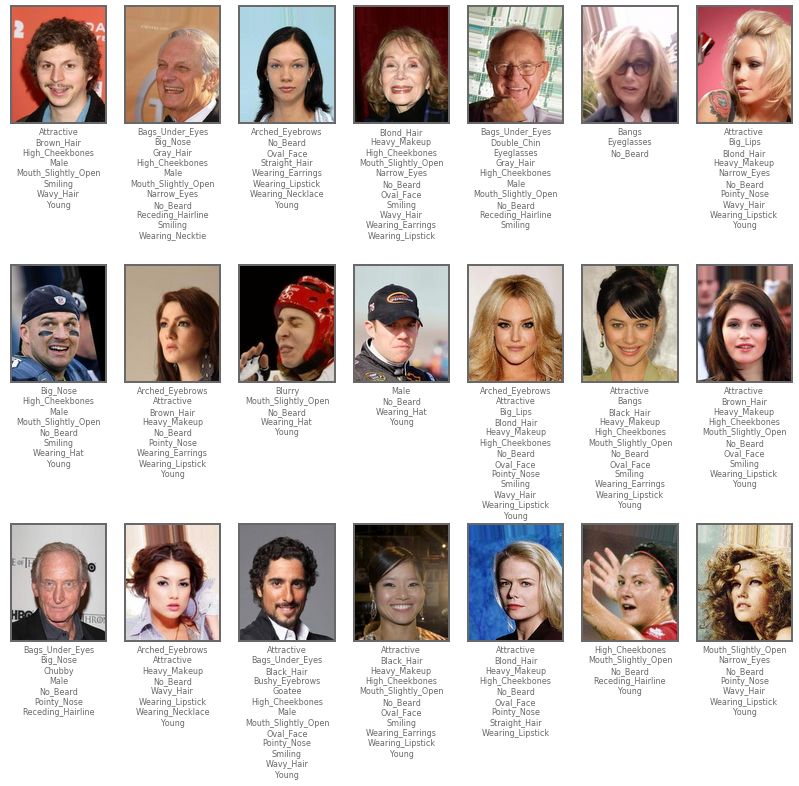

In [21]:
ooo.plot_images(imgs,desc,x_size=2,y_size=2,fontsize=8,columns=7,y_padding=2.5)

<div class='nota'>
    <b>Note :</b> With this approach, the use of data is much much more effective !
    <ul>
        <li>Data loading speed : <b>x 10</b> (81 s vs 16 min.)</li>
        <li>Memory efficiency  : <b>x 20</b> (21 Go vs 175 Go) </li>
    </ul>
</div>

----
That's all folks !